## Importing the libraries

In [2]:
import os
import numpy as np
import pandas as pd
#import matplotlib
#matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

## Reading in the data files

In [3]:
df_listings = pd.read_csv('Data/listings.csv', dtype='str')

## Data Exploration

### Listings Dataframe

In [4]:
df_listings.shape

(86358, 106)

In [5]:
pd.set_option('display.max_columns', None)

# show listings data sample
df_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20200414180850,2020-04-16,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,71%,89%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,4,4,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Islington, Greater London, United Kingdom",LB of Islington,Islington,NaN,Islington,Greater London,N4 3,London,"Islington, United Kingdom",GB,United Kingdom,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1,0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",538,$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,1,1,29,29,1.0,29.0,12 months ago,t,27,57,84,359,2020-04-16,21,7,2010-08-18,2020-02-22,97,10,10,10,10,9,9,f,NaN,NaN,f,f,moderate,f,f,2,1,1,0,0.18
1,15400,https://www.airbnb.com/rooms/15400,20200414180850,2020-04-16,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,NaN,NaN,https://a0.muscache.com/im/pictures/428392/462...,NaN,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a day,50%,67%,f,https://a0.muscache.com/im/users/60302/

In [6]:
set(df_listings.columns[df_listings.isnull().mean()>0.75])

{'jurisdiction_names',
 'license',
 'medium_url',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'square_feet',
 'thumbnail_url',
 'weekly_price',
 'xl_picture_url'}

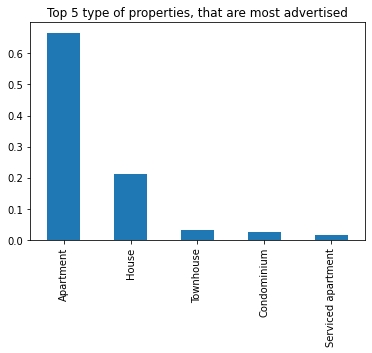

In [7]:
neighbourhood_vals = df_listings['property_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(neighbourhood_vals[0:5]/df_listings.shape[0]).plot(kind="bar");
plt.title("Top 5 type of properties, that are most advertised");

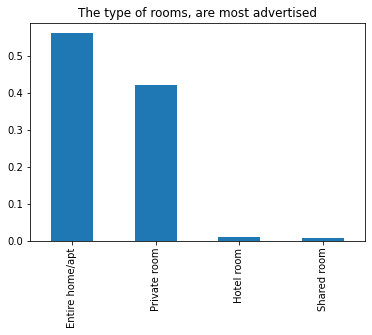

In [8]:
room_vals = df_listings['room_type'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category if your status_vals
# is set up correctly.

(room_vals/df_listings.shape[0]).plot(kind="bar");
plt.title("The type of rooms, are most advertised");

## The Business Questions

### What are Airbnb current challanges?

### Question 1
- What is the average price of the listings, for the different location within London?

In [9]:
price_df = df_listings[df_listings['price'].isnull() == False]

In [10]:
price_df.shape

(86358, 106)

In [11]:
price_df['neighbourhood_cleansed'].value_counts()

Westminster               9943
Tower Hamlets             8321
Camden                    6243
Hackney                   6210
Kensington and Chelsea    6079
Islington                 5019
Southwark                 4957
Lambeth                   4881
Wandsworth                4261
Hammersmith and Fulham    4233
Brent                     2605
Lewisham                  2326
Haringey                  2233
Newham                    2071
Ealing                    1790
Greenwich                 1736
Barnet                    1670
Waltham Forest            1476
Merton                    1364
Richmond upon Thames      1217
Hounslow                  1105
Croydon                   1091
Redbridge                  752
Enfield                    710
Hillingdon                 666
Bromley                    654
Kingston upon Thames       550
City of London             491
Harrow                     473
Barking and Dagenham       396
Sutton                     318
Bexley                     261
Havering

In [12]:
price_df['price'] = price_df['price'].str.replace('$', '', regex=True)
price_df['price'] = price_df['price'].str.replace(',', '', regex=True)
price_df['price'] = price_df['price'].astype(float)

In [13]:
nb_price_avg = price_df.groupby('neighbourhood_cleansed', as_index=False).mean()
nb_price_avg = pd.DataFrame(nb_price_avg).sort_values(by='price', ascending=False)

In [14]:
nb_price_avg = nb_price_avg.rename(columns={'neighbourhood_cleansed':'Neighbourhood','price': 'Avg Price'})

[Text(0, 0, 'Westminster'),
 Text(0, 0, 'Kensington and Chelsea'),
 Text(0, 0, 'City of London'),
 Text(0, 0, 'Camden'),
 Text(0, 0, 'Hammersmith and Fulham'),
 Text(0, 0, 'Richmond upon Thames'),
 Text(0, 0, 'Wandsworth'),
 Text(0, 0, 'Southwark'),
 Text(0, 0, 'Islington'),
 Text(0, 0, 'Merton'),
 Text(0, 0, 'Hounslow'),
 Text(0, 0, 'Brent'),
 Text(0, 0, 'Lambeth'),
 Text(0, 0, 'Tower Hamlets'),
 Text(0, 0, 'Hackney'),
 Text(0, 0, 'Barnet'),
 Text(0, 0, 'Haringey'),
 Text(0, 0, 'Greenwich'),
 Text(0, 0, 'Ealing'),
 Text(0, 0, 'Sutton'),
 Text(0, 0, 'Newham'),
 Text(0, 0, 'Kingston upon Thames'),
 Text(0, 0, 'Harrow'),
 Text(0, 0, 'Waltham Forest'),
 Text(0, 0, 'Redbridge'),
 Text(0, 0, 'Lewisham'),
 Text(0, 0, 'Hillingdon'),
 Text(0, 0, 'Havering'),
 Text(0, 0, 'Enfield'),
 Text(0, 0, 'Bromley'),
 Text(0, 0, 'Barking and Dagenham'),
 Text(0, 0, 'Croydon'),
 Text(0, 0, 'Bexley')]

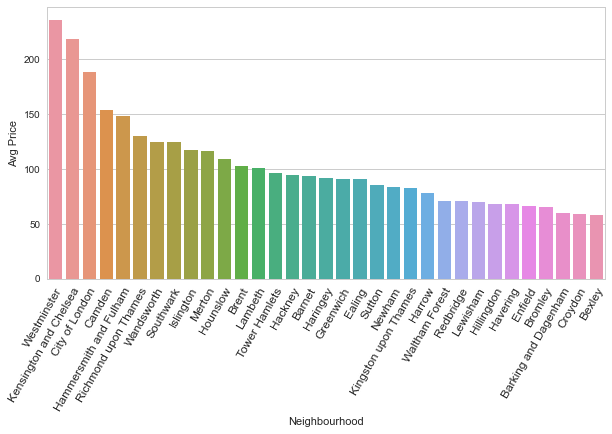

In [15]:
plt.figure(figsize=(10,5))

sns.set(style="whitegrid")
chart = sns.barplot(x="Neighbourhood", y="Avg Price", data=nb_price_avg)

chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium', 
    rotation_mode='anchor'
)

### Question 2

- What types of verifications are hosts using? How long did it take them to respond?

In [49]:
verifications_df = df_listings[df_listings['host_verifications'].isnull() == False]

In [50]:
verifications_df.shape

(86358, 106)

In [51]:
verifications_df = verifications_df[verifications_df['host_verifications'] != '[]']

In [52]:
verifications_df.shape

(86272, 106)

In [53]:
verifications_df['host_verifications'].value_counts()

['email', 'phone', 'reviews', 'jumio', 'government_id']                                                                           9206
['email', 'phone']                                                                                                                8562
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']                     6470
['email', 'phone', 'reviews']                                                                                                     5497
['email', 'phone', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']                                         4872
                                                                                                                                  ... 
['phone', 'reviews', 'jumio']                                                                                                        1
['email', 'google', 'reviews', 'jumio', 'offline_govern

In [66]:
def verifications_types(column):
    verifications_dict = {}
    temp = []

    for i in column:
        temp.append(eval(i))
    
    for i in temp:
        try:
            for j in i:
                if j not in verifications_types:
                    verifications_dict[j] = 1
                else:
                    verifications_dict[j] += 1
        except:
            continue
        
verifications_types = verifications_types(verifications_df['host_verifications'])

In [78]:
for k,v in verifications_types.items():
    verifications_types[k] = round(v / verifications_df.shape[0] * 100, 3)

In [79]:
verifications_types

{'email': 0.0,
 'phone': 0.0,
 'facebook': 0.0,
 'reviews': 0.0,
 'offline_government_id': 0.0,
 'selfie': 0.0,
 'government_id': 0.0,
 'jumio': 0.0,
 'identity_manual': 0.0,
 'work_email': 0.0,
 'kba': 0.0,
 'manual_offline': 0.0,
 'manual_online': 0.0,
 'google': 0.0,
 'sent_id': 0.0,
 'photographer': 0.0,
 'weibo': 0.0,
 'sesame': 0.0,
 'sesame_offline': 0.0,
 'zhima_selfie': 0.0}

### Question 3
- What features assist in obtaining a good review score? 
    - Could the score be predicted?
    - importance of the features, rank features

#### The Data Preparation

In [ ]:
# Dropping columns that are not needed from the listings dataframe
def drop_columns(words,df):
    for word in words:
        df = df.drop(df.filter(regex=word).columns, axis=1)
    
    return df

column_words = ['url','scrape','jurisdiction_names','license','weekly_price','monthly_price',
                'availability','square_feet','minimum','maximum','calculated','id']
df_listings = drop_columns(column_words, df_listings)

In [ ]:
df_listings.head(3)

In [ ]:
df_listings = df_listings.dropna(subset=["review_scores_rating"])

In [ ]:
def change_to_int(df):
    return df.astype('int64')

df_listings["id"] = change_to_int(df_listings["id"])
df_listings["review_scores_rating"] = change_to_int(df_listings["review_scores_rating"])
df_listings["review_scores_rating"] = change_to_int(df_listings["review_scores_rating"])
df_listings["review_scores_accuracy"] = change_to_int(df_listings["review_scores_accuracy"])
df_listings["review_scores_cleanliness"] = change_to_int(df_listings["review_scores_cleanliness"])
df_listings["review_scores_checkin"] = change_to_int(df_listings["review_scores_checkin"])
df_listings["review_scores_communication"] = change_to_int(df_listings["review_scores_communication"])
df_listings["review_scores_location"] = change_to_int(df_listings["review_scores_location"])
df_listings["review_scores_rating"] = change_to_int(df_listings["review_scores_value"])